In [1]:
pip install pandas numpy matplotlib seaborn chess.pgn scikit-learn


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement chess.pgn (from versions: none)
ERROR: No matching distribution found for chess.pgn


In [2]:
pip install python-chess


Note: you may need to restart the kernel to use updated packages.


In [1]:
import chess.pgn  # ✅ this works after installing python-chess


In [3]:
import chess.pgn
import pandas as pd

# Replace this with your actual PGN file path
pgn_path = "dataset3.pgn"

games = []

with open(pgn_path, encoding='utf-8') as pgn:
    while True:
        game = chess.pgn.read_game(pgn)
        if game is None:
            break

        headers = game.headers
        try:
            games.append({
                "White": headers.get("White"),
                "Black": headers.get("Black"),
                "WhiteElo": int(headers.get("WhiteElo", 0)),
                "BlackElo": int(headers.get("BlackElo", 0)),
                "Result": headers.get("Result"),
                "TimeControl": headers.get("TimeControl"),
                "ECO": headers.get("ECO"),
                "PlyCount": int(headers.get("PlyCount", 0)),
                "Date": headers.get("Date")
            })
        except Exception:
            continue

# Convert to a DataFrame
df = pd.DataFrame(games)
df.head()


,White,Black,WhiteElo,BlackElo,Result,TimeControl,ECO,PlyCount,Date
0,Moondance,morlok,1702,1429,1-0,180+0,A84,77,2025.05.30
1,JozeG,eisinger,1852,1659,1-0,180+0,D01,71,2025.05.30
2,ChequeMade,Oak,1677,1559,1-0,180+0,C23,75,2025.05.30
3,Crown,haberdashery,1569,1674,1-0,300+0,D06,53,2025.05.30
4,defensamaya,Mentallytough,1521,1515,0-1,180+0,A00,68,2025.05.30


In [4]:
df.to_csv("chess_games_cleaned.csv", index=False)


In [5]:
import pandas as pd

df = pd.read_csv("chess_games_cleaned.csv")
df.head()


,White,Black,WhiteElo,BlackElo,Result,TimeControl,ECO,PlyCount,Date
0,Moondance,morlok,1702,1429,1-0,180+0,A84,77,2025.05.30
1,JozeG,eisinger,1852,1659,1-0,180+0,D01,71,2025.05.30
2,ChequeMade,Oak,1677,1559,1-0,180+0,C23,75,2025.05.30
3,Crown,haberdashery,1569,1674,1-0,300+0,D06,53,2025.05.30
4,defensamaya,Mentallytough,1521,1515,0-1,180+0,A00,68,2025.05.30


In [6]:
import pandas as pd

# Load your saved CSV
df = pd.read_csv("chess_games_cleaned.csv")

# Drop rows with missing or 0 Elo values
df = df[(df["WhiteElo"] > 0) & (df["BlackElo"] > 0)]

# Ensure numeric columns are correct
df["WhiteElo"] = pd.to_numeric(df["WhiteElo"], errors="coerce")
df["BlackElo"] = pd.to_numeric(df["BlackElo"], errors="coerce")
df["PlyCount"] = pd.to_numeric(df["PlyCount"], errors="coerce")
df.dropna(inplace=True)

# Add Elo difference
df["EloDiff"] = df["WhiteElo"] - df["BlackElo"]

# View result
df.head()


,White,Black,WhiteElo,BlackElo,Result,TimeControl,ECO,PlyCount,Date,EloDiff
0,Moondance,morlok,1702,1429,1-0,180+0,A84,77,2025.05.30,273
1,JozeG,eisinger,1852,1659,1-0,180+0,D01,71,2025.05.30,193
2,ChequeMade,Oak,1677,1559,1-0,180+0,C23,75,2025.05.30,118
3,Crown,haberdashery,1569,1674,1-0,300+0,D06,53,2025.05.30,-105
4,defensamaya,Mentallytough,1521,1515,0-1,180+0,A00,68,2025.05.30,6


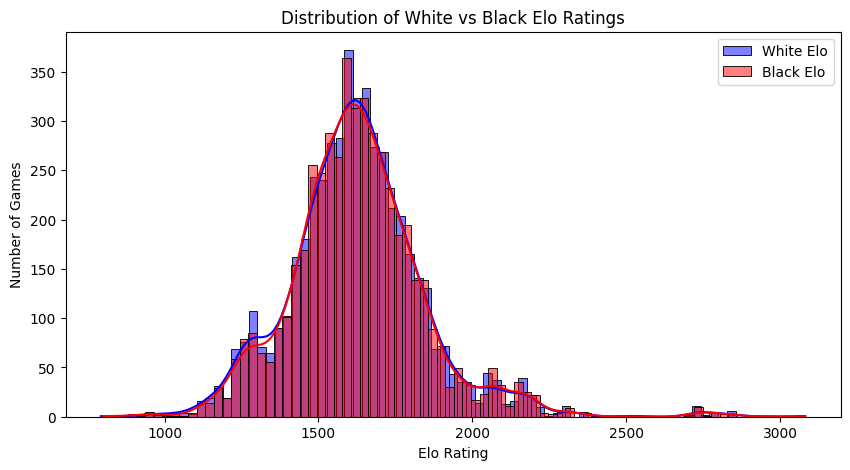

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["WhiteElo"], color="blue", label="White Elo", kde=True)
sns.histplot(df["BlackElo"], color="red", label="Black Elo", kde=True)
plt.legend()
plt.title("Distribution of White vs Black Elo Ratings")
plt.xlabel("Elo Rating")
plt.ylabel("Number of Games")
plt.show()


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_7852\2529525952.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Result", palette="Set2")


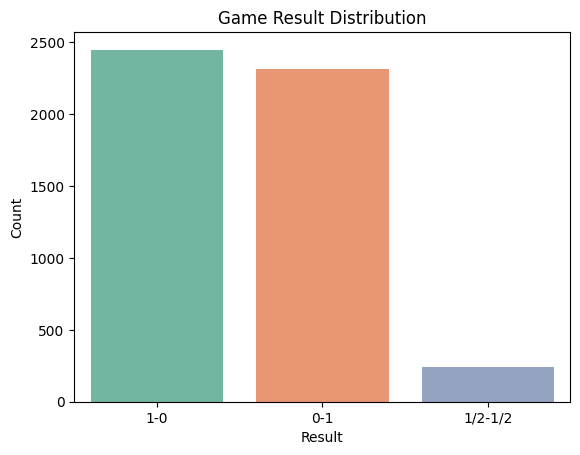

In [8]:
sns.countplot(data=df, x="Result", palette="Set2")
plt.title("Game Result Distribution")
plt.xlabel("Result")
plt.ylabel("Count")
plt.show()


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_7852\3757568927.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Result", y="EloDiff", palette="Set3")


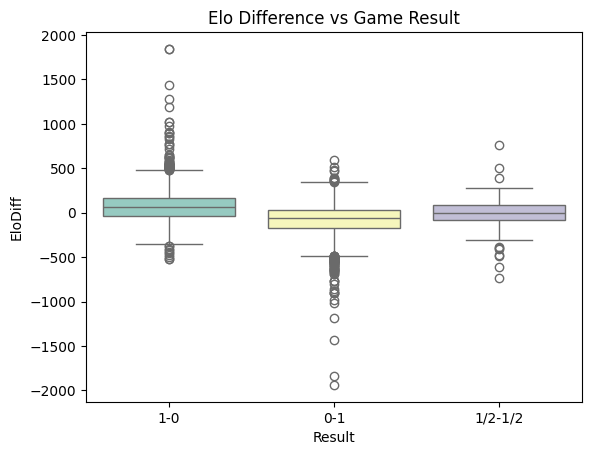

In [9]:
sns.boxplot(data=df, x="Result", y="EloDiff", palette="Set3")
plt.title("Elo Difference vs Game Result")
plt.show()


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_7852\2524664185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings.index, y=top_openings.values, palette="viridis")


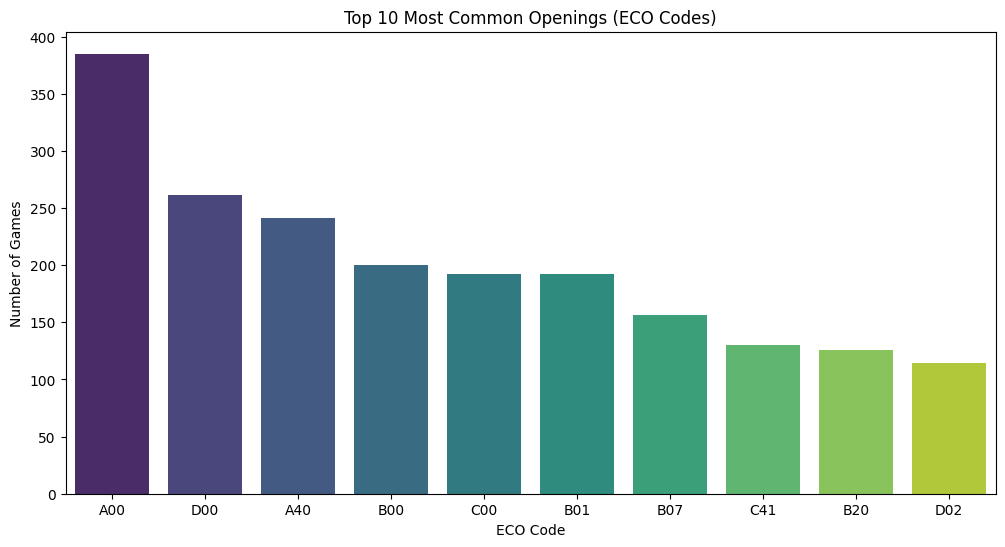

In [10]:
plt.figure(figsize=(12,6))
top_openings = df["ECO"].value_counts().head(10)
sns.barplot(x=top_openings.index, y=top_openings.values, palette="viridis")
plt.title("Top 10 Most Common Openings (ECO Codes)")
plt.xlabel("ECO Code")
plt.ylabel("Number of Games")
plt.show()


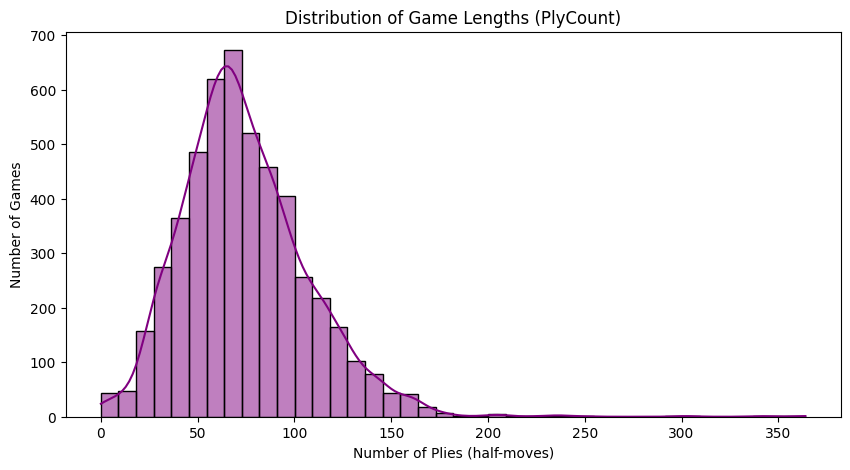

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df["PlyCount"], bins=40, kde=True, color="purple")
plt.title("Distribution of Game Lengths (PlyCount)")
plt.xlabel("Number of Plies (half-moves)")
plt.ylabel("Number of Games")
plt.show()


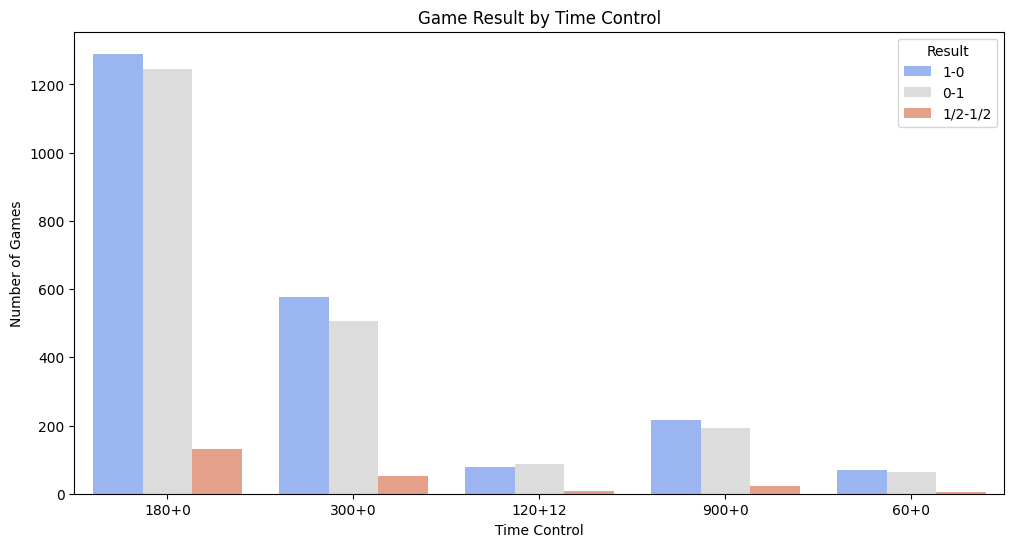

In [12]:
# Show top 5 time controls only for clarity
top_controls = df["TimeControl"].value_counts().head(5).index
filtered = df[df["TimeControl"].isin(top_controls)]

plt.figure(figsize=(12,6))
sns.countplot(data=filtered, x="TimeControl", hue="Result", palette="coolwarm")
plt.title("Game Result by Time Control")
plt.xlabel("Time Control")
plt.ylabel("Number of Games")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Define target: Binary – 1 if White wins, 0 otherwise
df["WhiteWin"] = df["Result"].apply(lambda x: 1 if x == "1-0" else 0)

# 2. Encode categorical variables: ECO and TimeControl
le_eco = LabelEncoder()
le_time = LabelEncoder()

df["ECO_enc"] = le_eco.fit_transform(df["ECO"])
df["TimeControl_enc"] = le_time.fit_transform(df["TimeControl"])

# 3. Select features
features = ["WhiteElo", "BlackElo", "EloDiff", "PlyCount", "ECO_enc", "TimeControl_enc"]
X = df[features]
y = df["WhiteWin"]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.683

Confusion Matrix:
 [[350 156]
 [161 333]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.69      0.69       506
           1       0.68      0.67      0.68       494

    accuracy                           0.68      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.68      0.68      0.68      1000



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
# Predict
y_pred = model_lr.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.68
Confusion Matrix:
[[350 156]
 [161 333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       506
           1       0.68      0.67      0.68       494

    accuracy                           0.68      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.68      0.68      0.68      1000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict
y_pred_rf = model_rf.predict(X_test)

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.66
Confusion Matrix:
[[354 152]
 [192 302]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       506
           1       0.67      0.61      0.64       494

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



In [3]:
import pandas as pd

# Load your dataset (replace with your actual CSV filename)
df = pd.read_csv("chess_games_cleaned.csv")

# Now try EloDiff
df["EloDiff"] = df["WhiteElo"] - df["BlackElo"]
df[["WhiteElo", "BlackElo", "EloDiff"]].head()



,WhiteElo,BlackElo,EloDiff
0,1702,1429,273
1,1852,1659,193
2,1677,1559,118
3,1569,1674,-105
4,1521,1515,6


In [4]:
def categorize_elo(elo):
    if elo < 1200:
        return 'Beginner'
    elif elo < 1600:
        return 'Intermediate'
    else:
        return 'Advanced'

df["WhiteCategory"] = df["WhiteElo"].apply(categorize_elo)
df["BlackCategory"] = df["BlackElo"].apply(categorize_elo)

df[["WhiteElo", "WhiteCategory", "BlackElo", "BlackCategory"]].head()


,WhiteElo,WhiteCategory,BlackElo,BlackCategory
0,1702,Advanced,1429,Intermediate
1,1852,Advanced,1659,Advanced
2,1677,Advanced,1559,Intermediate
3,1569,Intermediate,1674,Advanced
4,1521,Intermediate,1515,Intermediate


In [5]:
def get_game_type(time_control):
    try:
        base_time = int(time_control.split('+')[0])
        if base_time <= 180:
            return 'Blitz'
        elif base_time <= 600:
            return 'Rapid'
        else:
            return 'Classical'
    except:
        return 'Unknown'

df["GameType"] = df["TimeControl"].apply(get_game_type)
df[["TimeControl", "GameType"]].head()


,TimeControl,GameType
0,180+0,Blitz
1,180+0,Blitz
2,180+0,Blitz
3,300+0,Rapid
4,180+0,Blitz


In [6]:
def get_opening_family(eco):
    if isinstance(eco, str):
        if eco.startswith('A'):
            return 'Flank'
        elif eco.startswith('B'):
            return 'Semi-Open'
        elif eco.startswith('C'):
            return 'Open'
        elif eco.startswith('D'):
            return 'Closed'
        elif eco.startswith('E'):
            return 'Indian'
    return 'Unknown'

df["OpeningFamily"] = df["ECO"].apply(get_opening_family)
df[["ECO", "OpeningFamily"]].head()


,ECO,OpeningFamily
0,A84,Flank
1,D01,Closed
2,C23,Open
3,D06,Closed
4,A00,Flank


In [7]:
df["GameLength"] = df["PlyCount"]  # or rename to GameDuration
df[["PlyCount", "GameLength"]].head()


,PlyCount,GameLength
0,77,77
1,71,71
2,75,75
3,53,53
4,68,68


In [8]:
df["WhiteWin"] = df["Result"].apply(lambda x: 1 if x == "1-0" else 0)
df[["Result", "WhiteWin"]].head()


,Result,WhiteWin
0,1-0,1
1,1-0,1
2,1-0,1
3,1-0,1
4,0-1,0


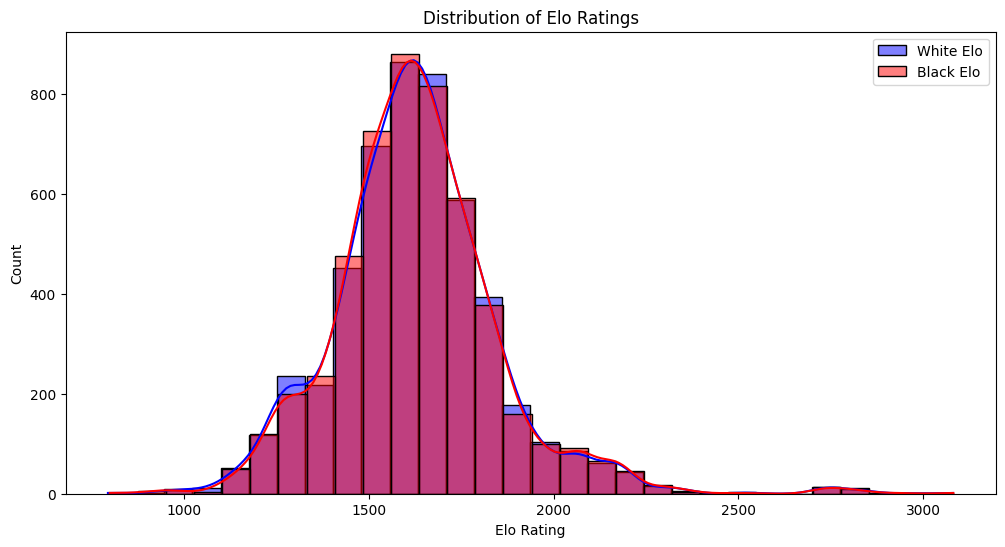

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df["WhiteElo"], color='blue', label='White Elo', kde=True, bins=30)
sns.histplot(df["BlackElo"], color='red', label='Black Elo', kde=True, bins=30)
plt.title("Distribution of Elo Ratings")
plt.xlabel("Elo Rating")
plt.ylabel("Count")
plt.legend()
plt.show()


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_5500\554988828.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elo_win_rate = df.groupby("EloDiffBucket")["WhiteWin"].mean().reset_index()
C:\Users\Puneetha\AppData\Local\Temp\ipykernel_5500\554988828.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=elo_win_rate, x="EloDiffBucket", y="WhiteWin", palette="viridis")


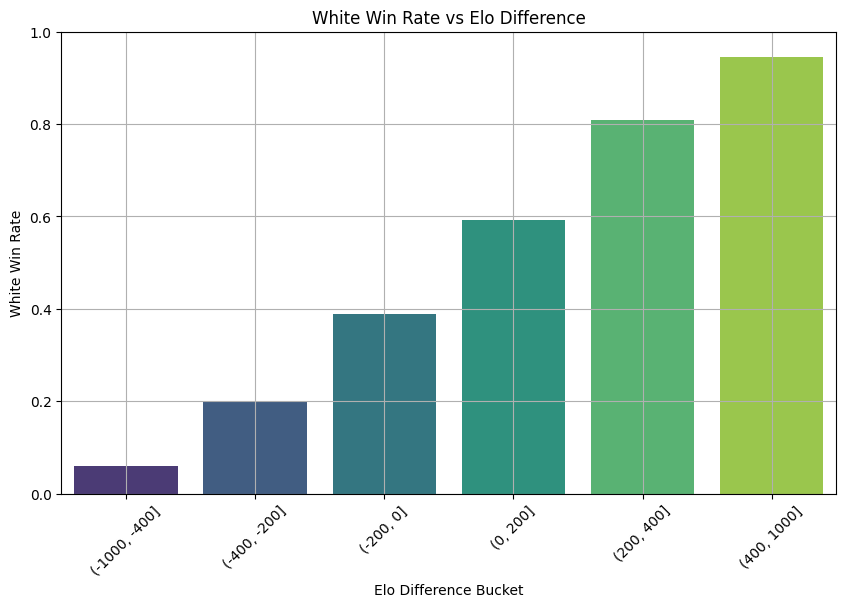

In [10]:
# Bucket Elo differences for grouping
df["EloDiffBucket"] = pd.cut(df["EloDiff"], bins=[-1000, -400, -200, 0, 200, 400, 1000])

# Calculate win rate for each bucket
elo_win_rate = df.groupby("EloDiffBucket")["WhiteWin"].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=elo_win_rate, x="EloDiffBucket", y="WhiteWin", palette="viridis")
plt.title("White Win Rate vs Elo Difference")
plt.ylabel("White Win Rate")
plt.xlabel("Elo Difference Bucket")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_5500\1250118857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=game_type_win_rate, x="GameType", y="WhiteWin", palette="pastel")


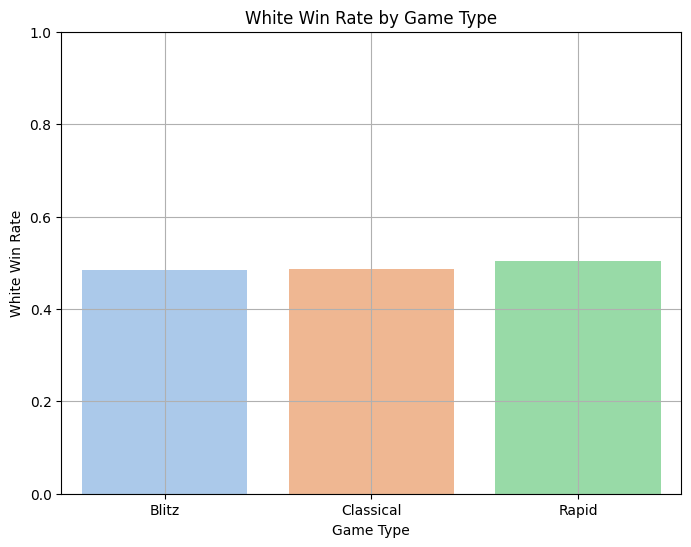

In [11]:
game_type_win_rate = df.groupby("GameType")["WhiteWin"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=game_type_win_rate, x="GameType", y="WhiteWin", palette="pastel")
plt.title("White Win Rate by Game Type")
plt.ylabel("White Win Rate")
plt.xlabel("Game Type")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_5500\3216151252.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=opening_win_rate, x="OpeningFamily", y="WhiteWin", palette="Set2")


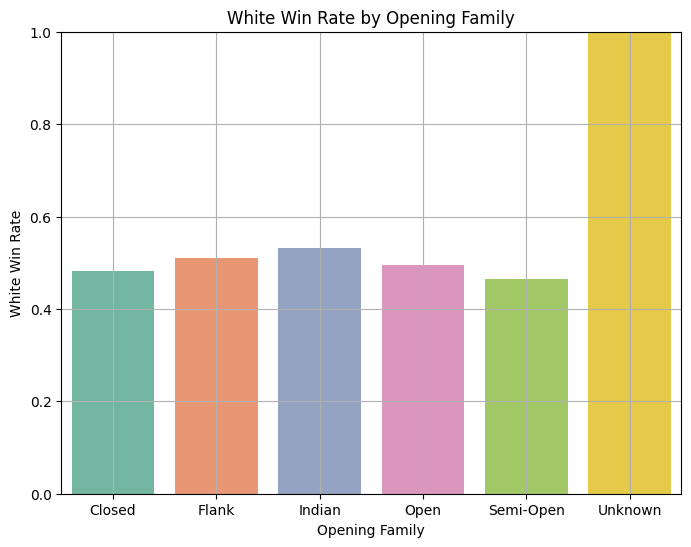

In [12]:
opening_win_rate = df.groupby("OpeningFamily")["WhiteWin"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=opening_win_rate, x="OpeningFamily", y="WhiteWin", palette="Set2")
plt.title("White Win Rate by Opening Family")
plt.ylabel("White Win Rate")
plt.xlabel("Opening Family")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_5500\2233838563.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_win_rate = df.groupby("GameLengthBucket")["WhiteWin"].mean().reset_index()
C:\Users\Puneetha\AppData\Local\Temp\ipykernel_5500\2233838563.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=length_win_rate, x="GameLengthBucket", y="WhiteWin", palette="coolwarm")


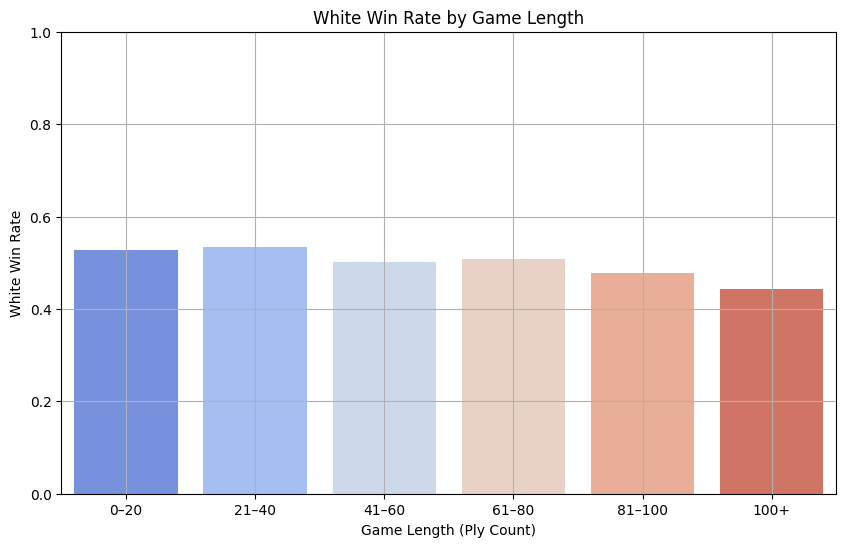

In [13]:
# Group by game length buckets
df["GameLengthBucket"] = pd.cut(df["GameLength"], bins=[0, 20, 40, 60, 80, 100, 150], 
                                labels=["0–20", "21–40", "41–60", "61–80", "81–100", "100+"])

length_win_rate = df.groupby("GameLengthBucket")["WhiteWin"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=length_win_rate, x="GameLengthBucket", y="WhiteWin", palette="coolwarm")
plt.title("White Win Rate by Game Length")
plt.xlabel("Game Length (Ply Count)")
plt.ylabel("White Win Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [14]:
# Select features for model
features = ["EloDiff", "GameLength", "GameType", "OpeningFamily"]
target = "WhiteWin"

# Convert categorical columns to numeric
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Add target
df_encoded[target] = df[target]

df_encoded.head()


,EloDiff,GameLength,GameType_Classical,GameType_Rapid,OpeningFamily_Flank,OpeningFamily_Indian,OpeningFamily_Open,OpeningFamily_Semi-Open,OpeningFamily_Unknown,WhiteWin
0,273,77,False,False,True,False,False,False,False,1
1,193,71,False,False,False,False,False,False,False,1
2,118,75,False,False,False,False,True,False,False,1
3,-105,53,False,True,False,False,False,False,False,1
4,6,68,False,False,True,False,False,False,False,0


In [15]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("WhiteWin", axis=1)
y = df_encoded["WhiteWin"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")


Training Samples: 4000
Testing Samples: 1000


In [16]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 5.5/150.0 MB 37.2 MB/s eta 0:00:04
   --- ------------------------------------ 13.4/150.0 MB 41.0 MB/s eta 0:00:04
   ---- ----------------------------------- 15.2/150.0 MB 28.4 MB/s eta 0:00:05
   ---- ----------------------------------- 16.0/150.0 MB 21.6 MB/s eta 0:00:07
   ---- ----------------------------------- 18.4/150.0 MB 18.7 MB/s eta 0:00:08
   ----- ---------------------------------- 19.7/150.0 MB 16.8 MB/s eta 0:00:08
   ----- ---------------------------------- 21.5/150.0 MB 15.5 MB/s eta 0:00:09
   ------ --------------------------------- 22.8/150.0 MB 14.6 MB/s eta 0:00:09
   ------ --------------------------------- 24.6/150.0 MB 13.5 MB/s eta 0:00:10
   ------ --------------------------------- 25.7/150.0 MB 13.0 MB/s eta 0:00:10
   ------- -------------------------------- 27.3/150.0 MB 12.2 MB/s eta 0:00:11
   ------- -------------------------------- 28.6/1

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", round(accuracy, 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


XGBoost Accuracy: 0.918
Confusion Matrix:
 [[449  40]
 [ 42 469]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       489
           1       0.92      0.92      0.92       511

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



c:\Users\Puneetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:56:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


C:\Users\Puneetha\AppData\Local\Temp\ipykernel_5500\3802940397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="rocket")


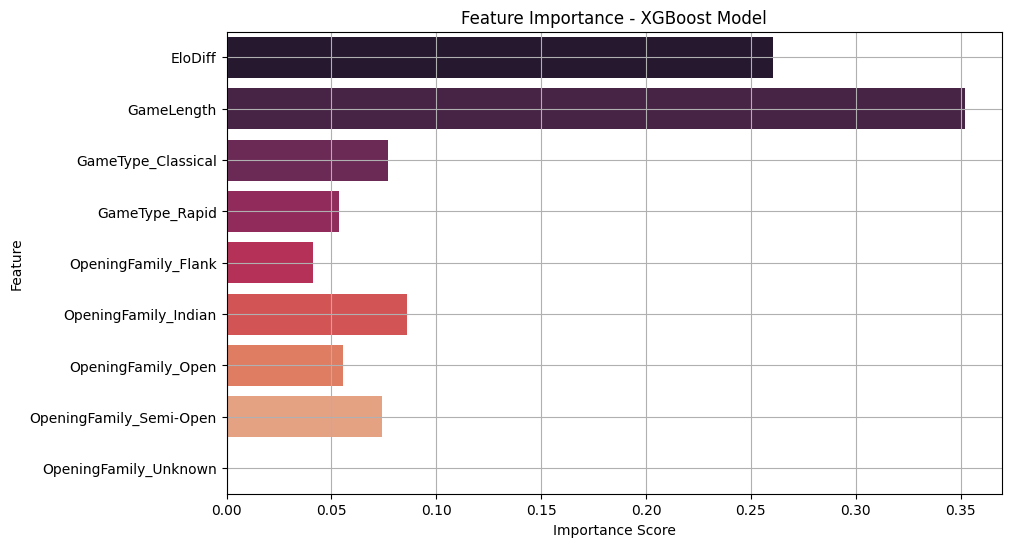

In [18]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="rocket")
plt.title("Feature Importance - XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


In [19]:
# Example game input (replace with any values you'd like to test)
new_game = {
    "EloDiff": 100,                 # White is 100 Elo higher
    "GameLength": 55,              # Medium-length game
    "GameType_Blitz": 1,           # Blitz game
    "GameType_Classical": 0,
    "OpeningFamily_Indian": 0,
    "OpeningFamily_Open": 1,
    "OpeningFamily_Semi-Open": 0
}

import pandas as pd

# Convert to DataFrame
new_game_df = pd.DataFrame([new_game])

# Ensure all features match training set
for col in X.columns:
    if col not in new_game_df.columns:
        new_game_df[col] = 0

# Reorder columns to match
new_game_df = new_game_df[X.columns]

# Predict
predicted = model.predict(new_game_df)[0]
print("Predicted Outcome: ", "White Wins" if predicted == 1 else "White Loses")


Predicted Outcome:  White Wins


In [20]:
# Simulate 5 diverse chess scenarios
test_games = pd.DataFrame([
    {
        "EloDiff": 200,  # Strong white player
        "GameLength": 65,
        "GameType_Blitz": 1,
        "GameType_Classical": 0,
        "OpeningFamily_Indian": 1,
        "OpeningFamily_Open": 0,
        "OpeningFamily_Semi-Open": 0
    },
    {
        "EloDiff": -150,  # Strong black player
        "GameLength": 40,
        "GameType_Blitz": 0,
        "GameType_Classical": 1,
        "OpeningFamily_Indian": 0,
        "OpeningFamily_Open": 1,
        "OpeningFamily_Semi-Open": 0
    },
    {
        "EloDiff": 0,  # Equal ratings
        "GameLength": 90,
        "GameType_Blitz": 0,
        "GameType_Classical": 1,
        "OpeningFamily_Indian": 0,
        "OpeningFamily_Open": 0,
        "OpeningFamily_Semi-Open": 1
    },
    {
        "EloDiff": 50,
        "GameLength": 25,
        "GameType_Blitz": 1,
        "GameType_Classical": 0,
        "OpeningFamily_Indian": 0,
        "OpeningFamily_Open": 1,
        "OpeningFamily_Semi-Open": 0
    },
    {
        "EloDiff": -20,
        "GameLength": 75,
        "GameType_Blitz": 0,
        "GameType_Classical": 1,
        "OpeningFamily_Indian": 1,
        "OpeningFamily_Open": 0,
        "OpeningFamily_Semi-Open": 0
    }
])

# Ensure column order matches training set
for col in X.columns:
    if col not in test_games.columns:
        test_games[col] = 0
test_games = test_games[X.columns]

# Predict outcomes
predictions = model.predict(test_games)

# Show results
for i, pred in enumerate(predictions):
    outcome = "White Wins" if pred == 1 else "White Loses"
    print(f"Scenario {i+1}: {outcome}")


Scenario 1: White Wins
Scenario 2: White Loses
Scenario 3: White Loses
Scenario 4: White Wins
Scenario 5: White Wins


In [21]:
# Calculate opening win rates
opening_win_rate = df.groupby('OpeningFamily')['WhiteWin'].mean().sort_values(ascending=False)

print("Opening Family Win Rates (White):")
print(opening_win_rate)


Opening Family Win Rates (White):
OpeningFamily
Unknown      1.000000
Indian       0.532258
Flank        0.509198
Open         0.494348
Closed       0.481276
Semi-Open    0.465593
Name: WhiteWin, dtype: float64


In [22]:
# Simulate aggression: longer games + higher EloDiff may suggest deeper strategies
df["AggressionScore"] = df["EloDiff"].abs() / df["GameLength"] * 10
df["AggressionLevel"] = pd.cut(df["AggressionScore"], bins=[0, 1, 2, 5, 10], labels=["Low", "Medium", "High", "Extreme"])


In [23]:
# Requires multiple games per player — only run if White names repeat
df['Date'] = pd.to_datetime(df['Date'])

# Track Elo trend per white player (for ERP reports)
elo_trend = df.groupby('White')[['Date', 'WhiteElo']].apply(lambda x: x.sort_values('Date')).reset_index(drop=True)

# Show sample
elo_trend.head(10)


,Date,WhiteElo
0,2025-05-30,1652
1,2025-05-30,1638
2,2025-05-30,1640
3,2025-05-30,1635
4,2025-05-30,1655
5,2025-05-30,1642
6,2025-05-30,1636
7,2025-05-30,1614
8,2025-05-30,1607
9,2025-05-30,1627


In [24]:
# Select top 3 frequent White players from your dataset
sample_players = df['White'].value_counts().head(3).index.tolist()

# Loop over each player and generate summary
for player in sample_players:
    player_games = df[df['White'] == player]
    
    # Calculate metrics
    total_games = len(player_games)
    win_rate = (player_games['WhiteWin'].sum() / total_games) * 100
    common_opening = player_games['OpeningFamily'].mode()[0] if not player_games['OpeningFamily'].isnull().all() else "Unknown"
    aggression = player_games['AggressionLevel'].mode()[0] if 'AggressionLevel' in player_games else "N/A"
    avg_elo = player_games['WhiteElo'].mean()
    last_game = player_games.sort_values('Date', ascending=False).iloc[0]
    last_result = "Win" if last_game['WhiteWin'] == 1 else "Loss"
    
    # Print summary
    print(f"\n📊 ERP Summary for Player: {player}")
    print(f"Total Games (White): {total_games}")
    print(f"Win Rate (White): {win_rate:.2f}%")
    print(f"Most Played Opening: {common_opening}")
    print(f"Aggression Level: {aggression}")
    print(f"Average Elo: {avg_elo:.0f}")
    print(f"Last Game Result: {last_result} on {last_game['Date'].date()}")



📊 ERP Summary for Player: LuigiBot
Total Games (White): 72
Win Rate (White): 58.33%
Most Played Opening: Semi-Open
Aggression Level: Extreme
Average Elo: 1625
Last Game Result: Loss on 2025-05-30

📊 ERP Summary for Player: inemuri
Total Games (White): 71
Win Rate (White): 43.66%
Most Played Opening: Flank
Aggression Level: Extreme
Average Elo: 1263
Last Game Result: Win on 2025-05-30

📊 ERP Summary for Player: rusalka
Total Games (White): 52
Win Rate (White): 42.31%
Most Played Opening: Closed
Aggression Level: Extreme
Average Elo: 1303
Last Game Result: Loss on 2025-05-30


In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define your parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1.0]
}

# Initialize XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,             # 3-fold cross validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1         # Use all cores
)

# Fit to your data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best Accuracy: 0.9097518007687828


c:\Users\Puneetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:07:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
# Train final XGBoost with best params
best_xgb = XGBClassifier(
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    subsample=1.0,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_xgb.fit(X_train, y_train)

# Predictions
y_pred_best = best_xgb.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test, y_pred_best)
print("Final Tuned XGBoost Accuracy:", acc)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


c:\Users\Puneetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:08:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final Tuned XGBoost Accuracy: 0.931
Confusion Matrix:
 [[457  32]
 [ 37 474]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       489
           1       0.94      0.93      0.93       511

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



C:\Users\Puneetha\AppData\Local\Temp\ipykernel_5500\2244601729.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')


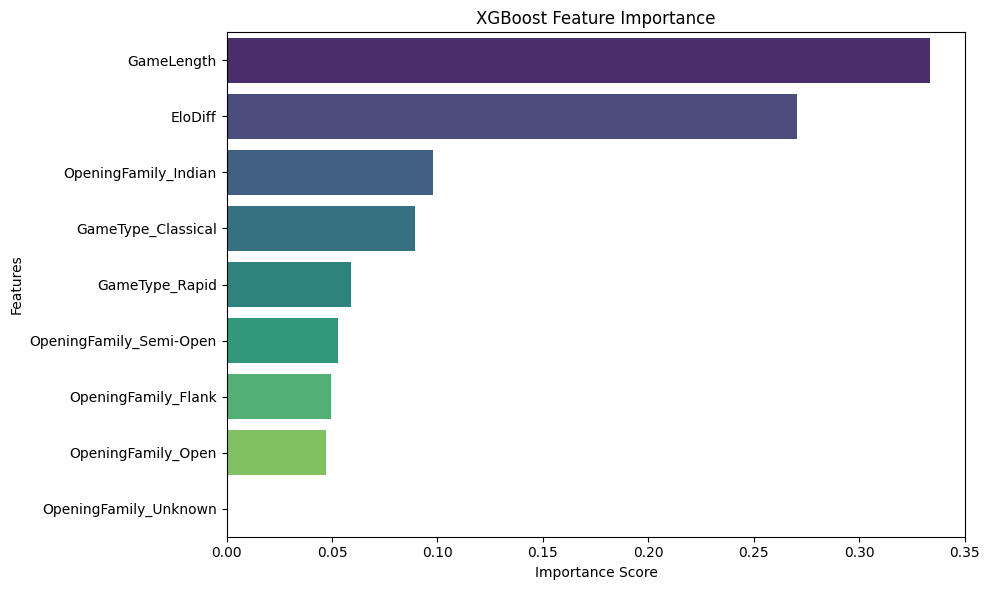

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from XGBoost
importances = best_xgb.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy plotting
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [28]:
pip install shap


   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 6.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 32.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ------------ --------------------------- 9.7/30.3 MB 44.9 MB/s eta 0:00:01
   --------------- ------------------------ 12.1/30.3 MB 27.4 MB/s eta 0:00:01
   ----------------- ---------------------- 13.6/30.3 MB 21.1 MB/s eta 0:00:01
   ------------------- -------------------- 14.9/30.3 MB 18.5 MB/s eta 0:00:01
   ---------------------- ----------------- 16.8/30.3 MB 15.9 MB/s eta 0:00:01
   ------------------------ --------------- 18.4/30.3 MB 14.6 MB/s eta 0:00:01
   ------------------------- -------------- 19.7/30.3 MB 13.6 MB/s eta 0:00:01
   ---------------------------- ----------- 21.2/30.3 MB 12.7 MB/s eta 0:00:01
  

In [29]:
import shap

# Use TreeExplainer for XGBoost
explainer = shap.Explainer(best_xgb, X_train)
shap_values = explainer(X_test)

# Explain the first prediction
shap.plots.force(shap_values[0])


c:\Users\Puneetha\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [30]:
print(X_train.dtypes)


EloDiff                    int64
GameLength                 int64
GameType_Classical          bool
GameType_Rapid              bool
OpeningFamily_Flank         bool
OpeningFamily_Indian        bool
OpeningFamily_Open          bool
OpeningFamily_Semi-Open     bool
OpeningFamily_Unknown       bool
dtype: object


In [31]:
# Convert all data to float
X_train_float = X_train.astype(float)
X_test_float = X_test.astype(float)


In [33]:
shap.initjs()


In [34]:
import shap

# Initialize SHAP TreeExplainer
explainer = shap.Explainer(best_xgb, X_train_float)

# Calculate SHAP values for test data
shap_values = explainer(X_test_float)

# Plot the first prediction (force plot)
shap.plots.force(shap_values[0])


In [36]:
# Ensure all columns are float type for SHAP compatibility
X_train = X_train.astype(float)
X_test = X_test.astype(float)



🎯 Scenario 1


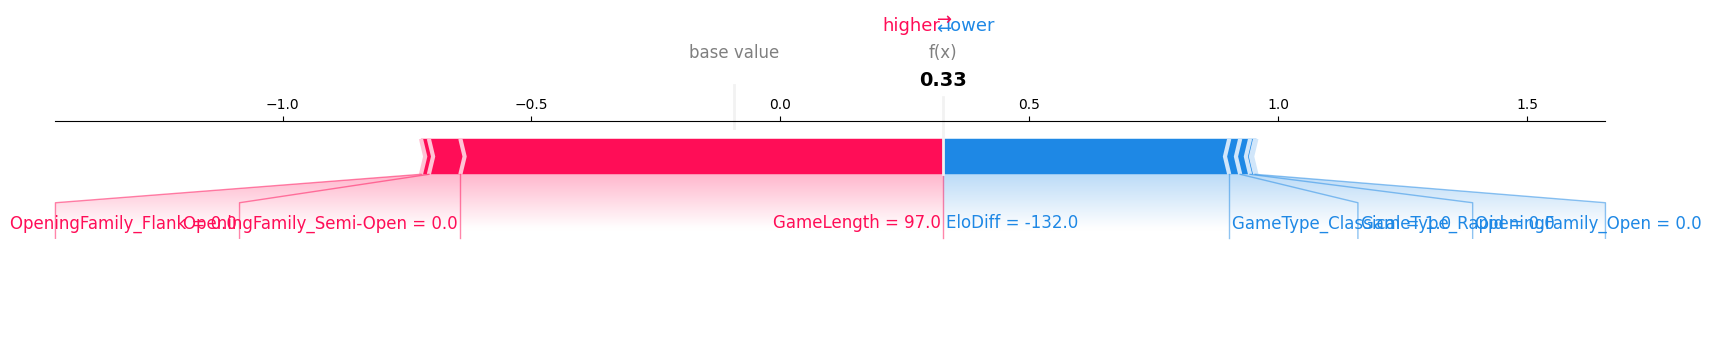


🎯 Scenario 2


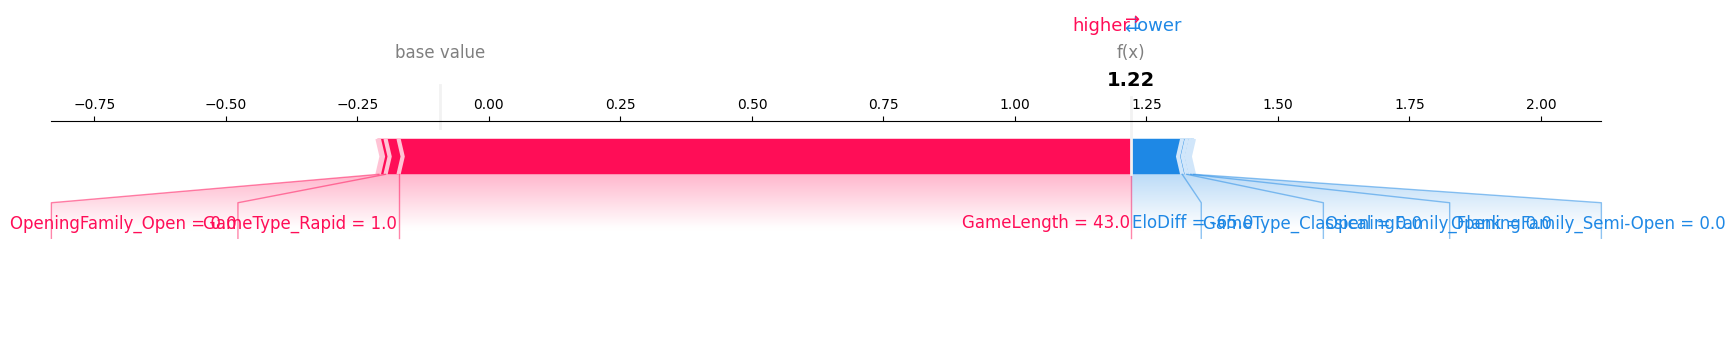


🎯 Scenario 3


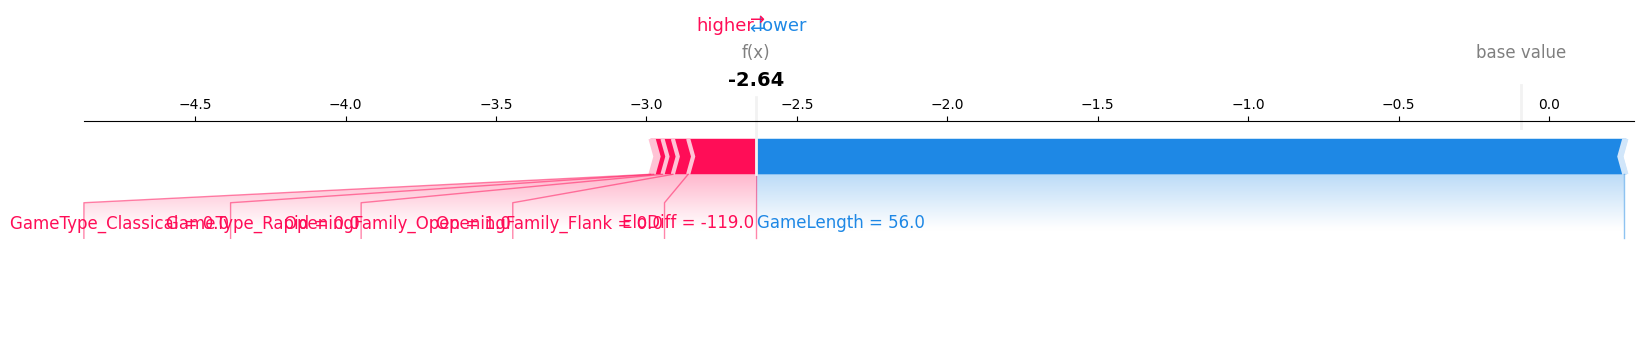


🎯 Scenario 4


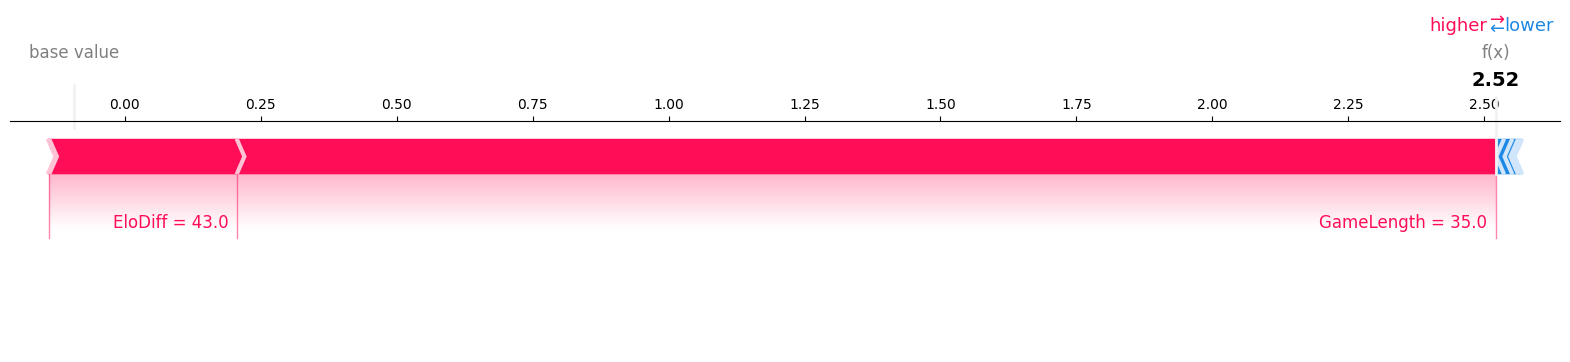


🎯 Scenario 5


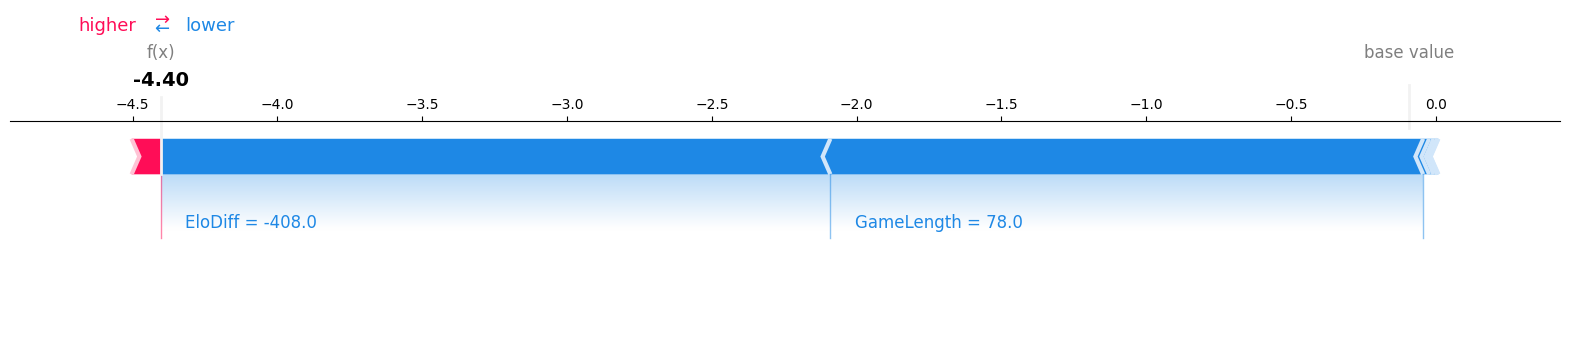

In [37]:
import shap
import matplotlib.pyplot as plt

# Create the explainer (if not already created)
explainer = shap.Explainer(best_xgb, X_train)
shap_values = explainer(X_test)

# Display force plots for the first 5 test samples
for i in range(5):
    print(f"\n🎯 Scenario {i+1}")
    shap.plots.force(shap_values[i], matplotlib=True)


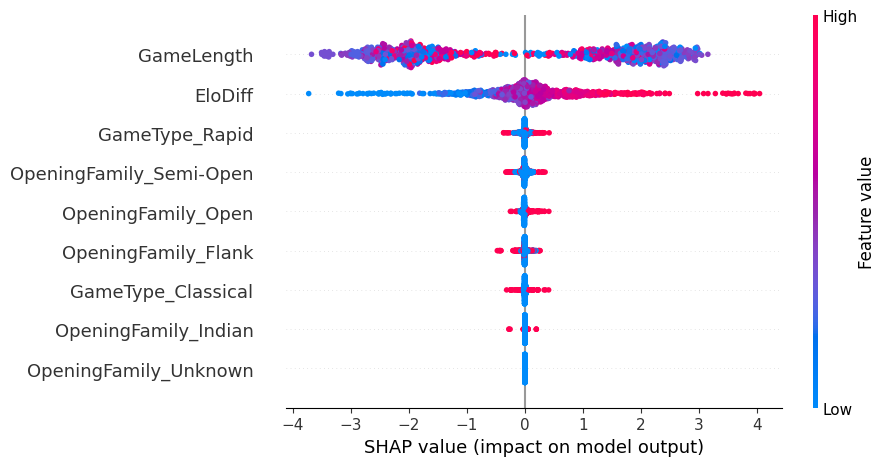

In [38]:
shap.plots.beeswarm(shap_values)


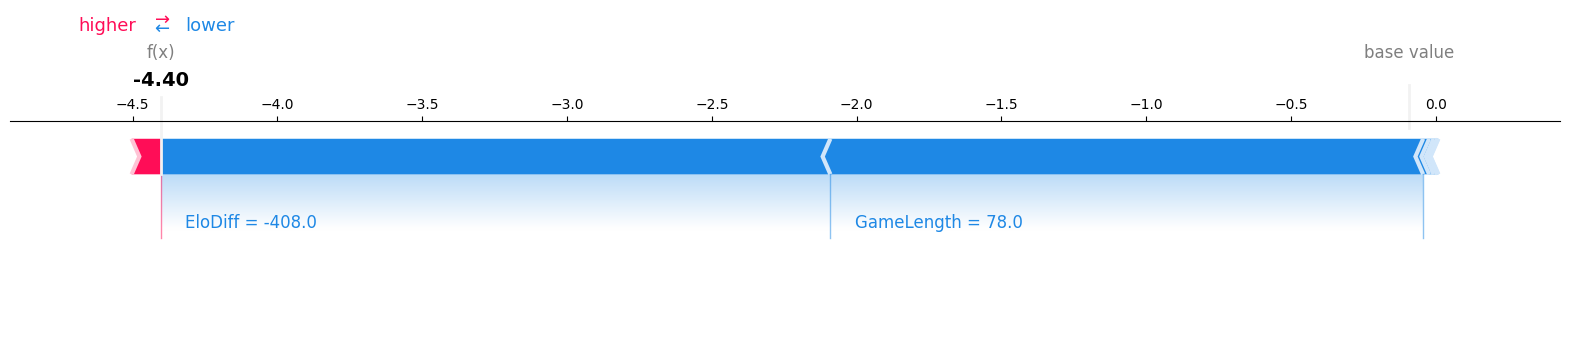

In [39]:
shap.plots.force(shap_values[i], matplotlib=True)


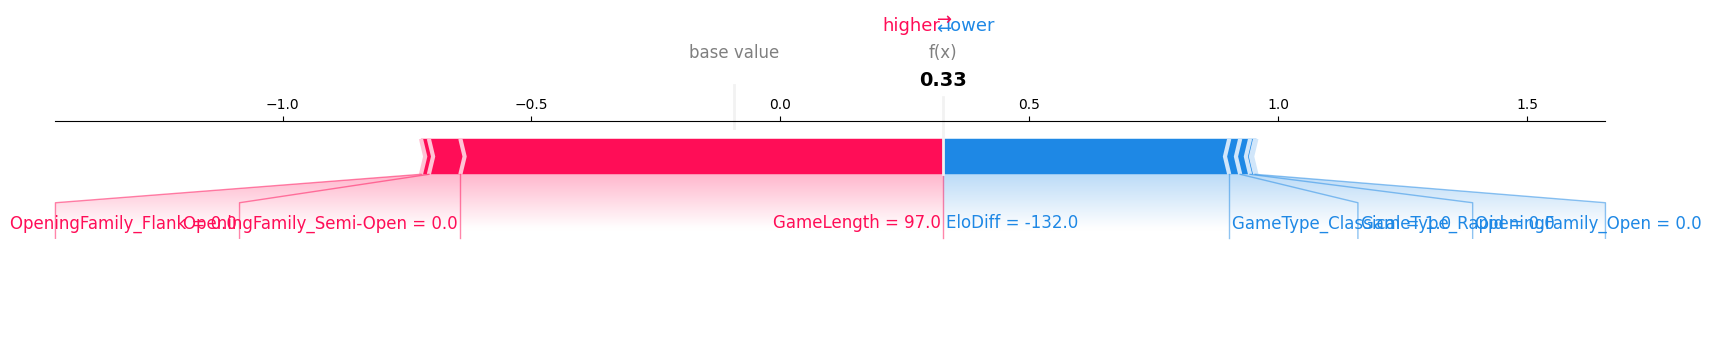

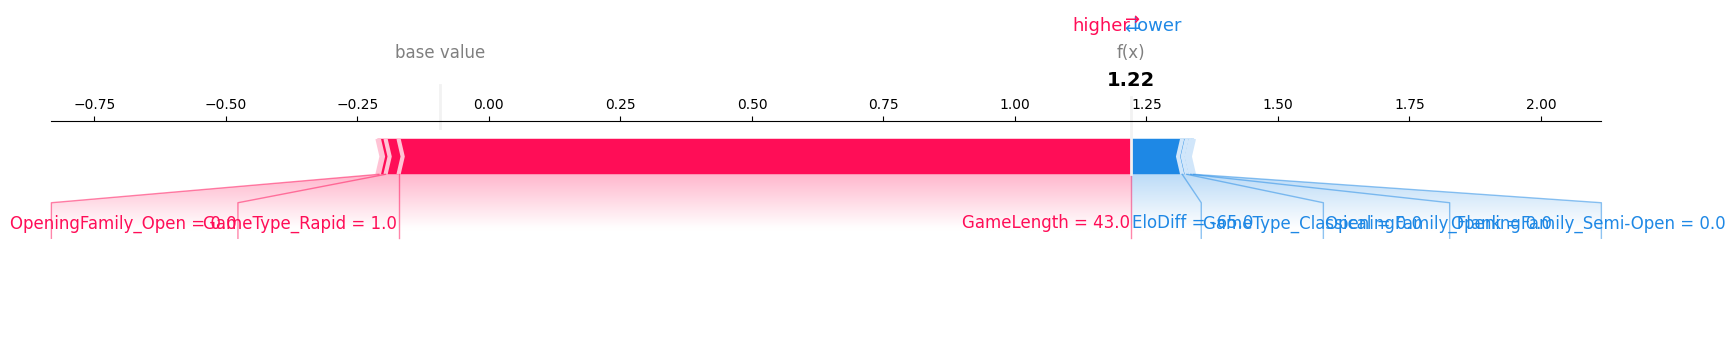

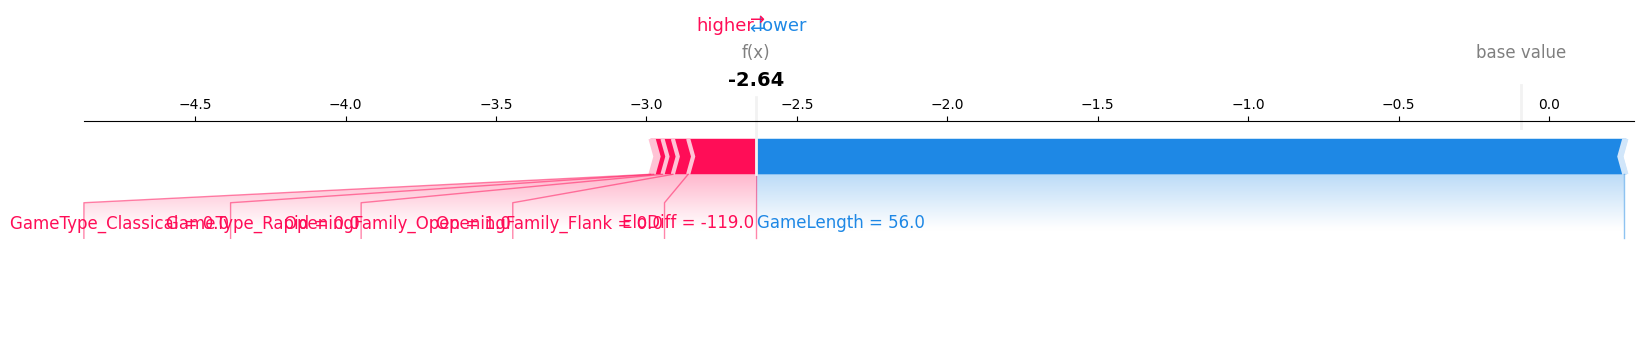

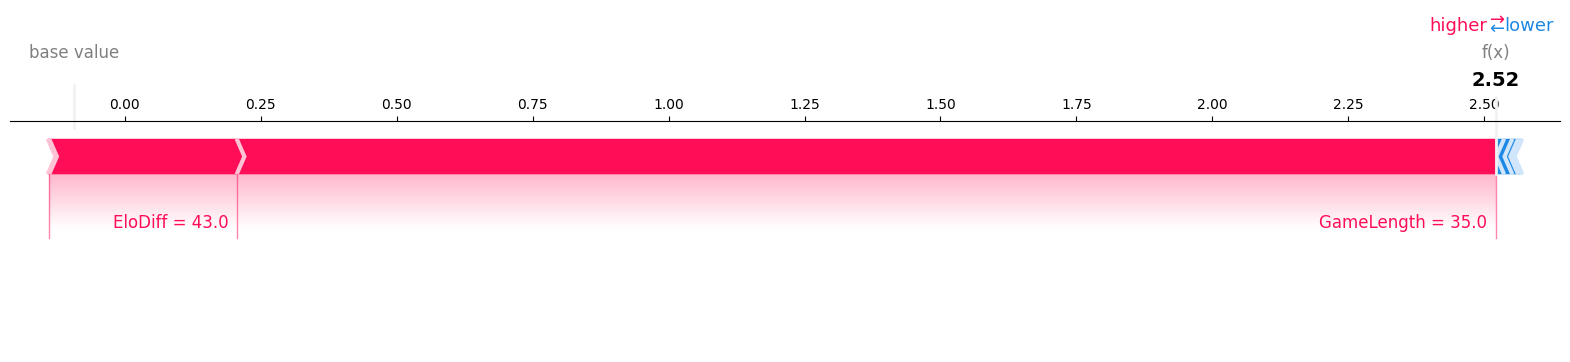

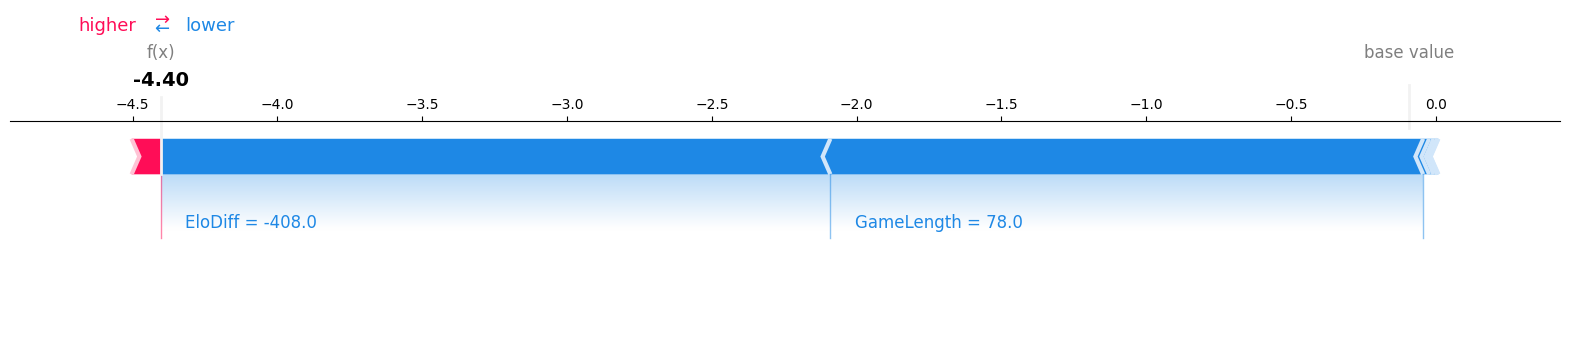

In [40]:
for i in range(5):
    shap.plots.force(shap_values[i], matplotlib=True)


In [41]:
shap_values[i].values  # Raw SHAP values
shap_values[i].base_values  # Base value
X_test.iloc[i]  # Feature values for that game


EloDiff                   -408.0
GameLength                  78.0
GameType_Classical           0.0
GameType_Rapid               0.0
OpeningFamily_Flank          1.0
OpeningFamily_Indian         0.0
OpeningFamily_Open           0.0
OpeningFamily_Semi-Open      0.0
OpeningFamily_Unknown        0.0
Name: 705, dtype: float64

In [42]:
# Convert all data to float
X_train_float = X_train.astype(float)
X_test_float = X_test.astype(float)


In [43]:
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df.to_csv("shap_values.csv", index=False)
